# Linear Regression and Temperature

In this notebook, we'll look at using linear regression to study changes in temperature.

## Setup

In [170]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

## Getting our data

We'll be getting data from [North America Land Data Assimilation System (NLDAS)](https://wonder.cdc.gov/NASA-NLDAS.html), which provides the daily average temperature from 1979-2011 for the United States.

For the next step, you will need to choose some settings in the data request form. These are:

- GroupBy: Month Day, Year
- Your State
- Export Results (check box)
- Show Zero Values (check box)

>1) Download the data for your home state (or state of your choosing) and upload it to M2 in your work directory.

# Loading our data

In [171]:
pwd


'/users/lmackenroth/ds_1300_notebooks/work'

In [172]:
df = pd.read_csv('/users/lmackenroth/ds_1300_notebooks/work/Kansas.txt',delimiter='\t',skipfooter=14,engine='python')

In [173]:
df

,Notes,"Month Day, Year","Month Day, Year Code",State,State Code,Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,Kansas,20,9.37
1,NaN,"Jan 02, 1979",1979/01/02,Kansas,20,14.82
2,NaN,"Jan 03, 1979",1979/01/03,Kansas,20,19.96
3,NaN,"Jan 04, 1979",1979/01/04,Kansas,20,14.99
4,NaN,"Jan 05, 1979",1979/01/05,Kansas,20,10.75
...,...,...,...,...,...,...
12048,NaN,"Dec 27, 2011",2011/12/27,Kansas,20,43.96
12049,NaN,"Dec 28, 2011",2011/12/28,Kansas,20,47.50
12050,NaN,"Dec 29, 2011",2011/12/29,Kansas,20,54.56
12051,NaN,"Dec 30, 2011",2011/12/30,Kansas,20,54.89


### Clean the data

>2) Drop any rows that have the value "Total" in the Notes column, then drop the Notes column

In [174]:
#df.drop(df[df["Notes"].str.contains("Total")].index)
df = df.drop(df[df.Notes == 'Total'].index)
df


,Notes,"Month Day, Year","Month Day, Year Code",State,State Code,Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,Kansas,20,9.37
1,NaN,"Jan 02, 1979",1979/01/02,Kansas,20,14.82
2,NaN,"Jan 03, 1979",1979/01/03,Kansas,20,19.96
3,NaN,"Jan 04, 1979",1979/01/04,Kansas,20,14.99
4,NaN,"Jan 05, 1979",1979/01/05,Kansas,20,10.75
...,...,...,...,...,...,...
12048,NaN,"Dec 27, 2011",2011/12/27,Kansas,20,43.96
12049,NaN,"Dec 28, 2011",2011/12/28,Kansas,20,47.50
12050,NaN,"Dec 29, 2011",2011/12/29,Kansas,20,54.56
12051,NaN,"Dec 30, 2011",2011/12/30,Kansas,20,54.89


>3) Make a column called Date that is in the pandas datetime format

In [175]:
df['Date'] = pd.to_datetime(df['Month Day, Year'],errors='raise')
df[['Month Day, Year','Date']]
df


,Notes,"Month Day, Year","Month Day, Year Code",State,State Code,Avg Daily Max Air Temperature (F),Date
0,NaN,"Jan 01, 1979",1979/01/01,Kansas,20,9.37,1979-01-01
1,NaN,"Jan 02, 1979",1979/01/02,Kansas,20,14.82,1979-01-02
2,NaN,"Jan 03, 1979",1979/01/03,Kansas,20,19.96,1979-01-03
3,NaN,"Jan 04, 1979",1979/01/04,Kansas,20,14.99,1979-01-04
4,NaN,"Jan 05, 1979",1979/01/05,Kansas,20,10.75,1979-01-05
...,...,...,...,...,...,...,...
12048,NaN,"Dec 27, 2011",2011/12/27,Kansas,20,43.96,2011-12-27
12049,NaN,"Dec 28, 2011",2011/12/28,Kansas,20,47.50,2011-12-28
12050,NaN,"Dec 29, 2011",2011/12/29,Kansas,20,54.56,2011-12-29
12051,NaN,"Dec 30, 2011",2011/12/30,Kansas,20,54.89,2011-12-30


>4) Make columns for 'Year', 'Month', and 'Day' by splitting the column 'Month Day, Year'

In [178]:
df[[ 'YEAR', 'DAY']] = df['Month Day, Year Code'].str.split('/', 1, expand=True)
df[['MONTH', 'DAY']] = df['DAY'].str.split('/', 1, expand=True)
#DATES_SORTED['MONTHInt'] = pd.to_numeric(df['MONTH'])
df = df.drop(columns=['Month Day, Year', 'Month Day, Year Code'] )

In [179]:
df['DateInt'] = df['Date'].astype(int)/10e10 # This will be used later
df['YEARInt'] = df['YEAR'].astype(int) # This will be used later
df['MONTHInt'] = df['MONTH'].astype(int)# This will be used later

df

,Notes,State,State Code,Avg Daily Max Air Temperature (F),Date,YEAR,DAY,MONTH,DateInt,YEARInt,MONTHInt
0,NaN,Kansas,20,9.37,1979-01-01,1979,01,01,2839968.0,1979,1
1,NaN,Kansas,20,14.82,1979-01-02,1979,02,01,2840832.0,1979,1
2,NaN,Kansas,20,19.96,1979-01-03,1979,03,01,2841696.0,1979,1
3,NaN,Kansas,20,14.99,1979-01-04,1979,04,01,2842560.0,1979,1
4,NaN,Kansas,20,10.75,1979-01-05,1979,05,01,2843424.0,1979,1
...,...,...,...,...,...,...,...,...,...,...,...
12048,NaN,Kansas,20,43.96,2011-12-27,2011,27,12,13249440.0,2011,12
12049,NaN,Kansas,20,47.50,2011-12-28,2011,28,12,13250304.0,2011,12
12050,NaN,Kansas,20,54.56,2011-12-29,2011,29,12,13251168.0,2011,12
12051,NaN,Kansas,20,54.89,2011-12-30,2011,30,12,13252032.0,2011,12


## Generating a scatter plot

> 4) Use df.plot.scatter to plot 'Date' vs 'Avg Daily Max Air Temperature (F)'. You might want to add figsize=(50,5) as an argument to make it more clear what is happening.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

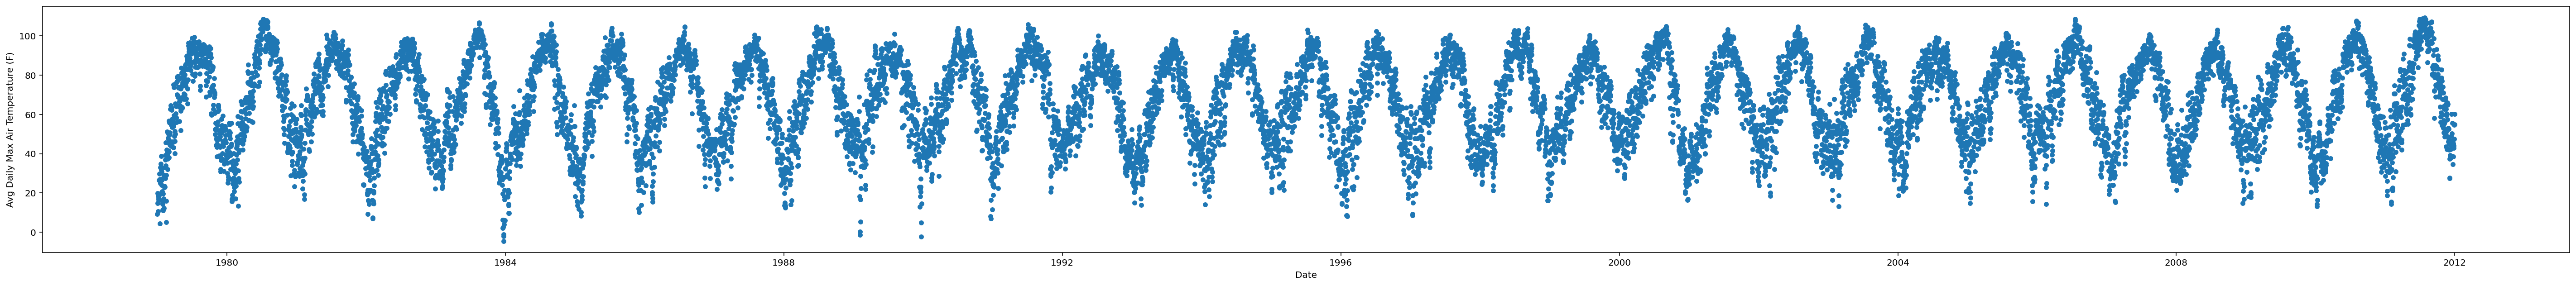

In [180]:
df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',figsize=(50,5))

>5) Describe your plot.

**Tracks the rise and fall of temperatures over the entire data set, looks like a sine/ cosine wave**


### Adding colors for our graph

In [181]:
# No need to edit this unless you want to try different colors or a pattern other than colors by month

cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['MONTHInt'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

df['color']=[c[int(i-1)] for i in df['MONTHInt'].astype(int)] # Adds a column to our dataframe with the color we want for each row

>6) Make the same plot as 4) but add color by adding the argument c=df\['color'\] to our plotting command.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

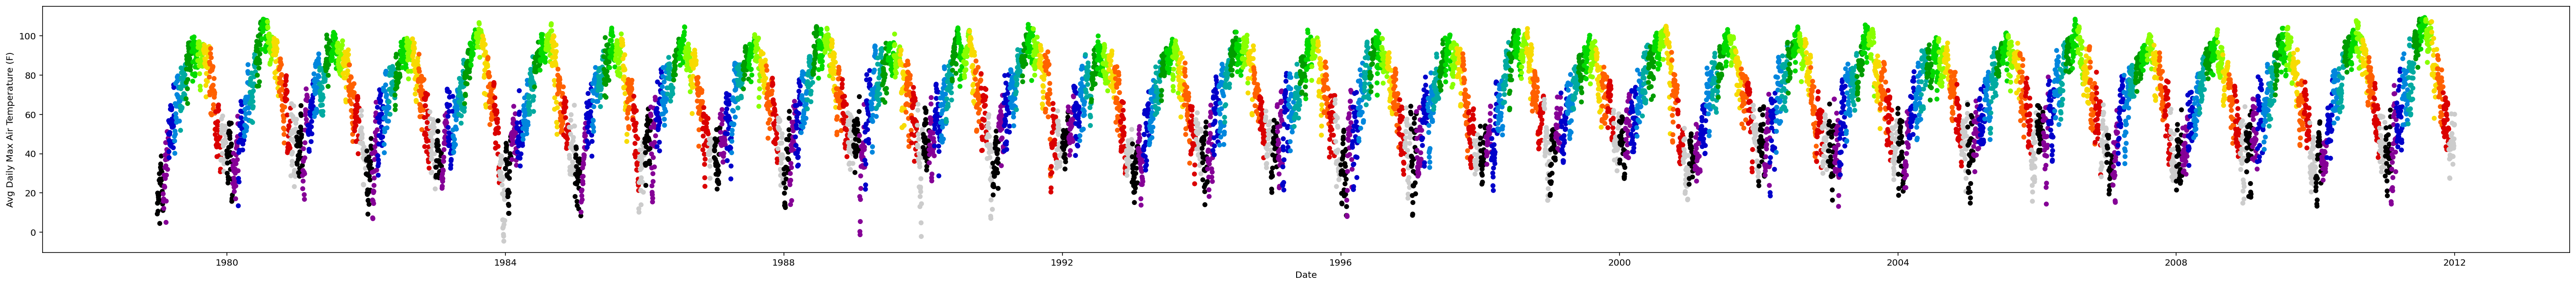

In [182]:
df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',figsize=(50,5), c=df['color'] )

## Pick a subset of the data

>7) Select a 6 month period from the data. # Hint use logic and pd.datetime(YYYY, MM, DD)

In [183]:
df['Date'] = pd.to_datetime(df['Date'])
start_date = pd.datetime(2000, 1, 1)  
end_date = pd.datetime(2000, 7, 31)


In [184]:
subset = df[(df['Date'] >= start_date) & (df['Date'] < end_date)]
subset

,Notes,State,State Code,Avg Daily Max Air Temperature (F),Date,YEAR,DAY,MONTH,DateInt,YEARInt,MONTHInt,color
7670,NaN,Kansas,20,56.44,2000-01-01,2000,01,01,9466848.0,2000,1,#000000
7671,NaN,Kansas,20,48.81,2000-01-02,2000,02,01,9467712.0,2000,1,#000000
7672,NaN,Kansas,20,35.24,2000-01-03,2000,03,01,9468576.0,2000,1,#000000
7673,NaN,Kansas,20,36.76,2000-01-04,2000,04,01,9469440.0,2000,1,#000000
7674,NaN,Kansas,20,45.75,2000-01-05,2000,05,01,9470304.0,2000,1,#000000
...,...,...,...,...,...,...,...,...,...,...,...,...
7877,NaN,Kansas,20,94.67,2000-07-26,2000,26,07,9645696.0,2000,7,#00da00
7878,NaN,Kansas,20,97.17,2000-07-27,2000,27,07,9646560.0,2000,7,#00da00
7879,NaN,Kansas,20,88.50,2000-07-28,2000,28,07,9647424.0,2000,7,#00da00
7880,NaN,Kansas,20,85.71,2000-07-29,2000,29,07,9648288.0,2000,7,#00da00


>8) Plot the subset using the the same code you used in 6). You can change the figsize if needed.

In [185]:
cmap = matplotlib.cm.get_cmap("nipy_spectral", len(subset['MONTHInt'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

subset['color']=[c[int(i-1)] for i in subset['MONTHInt'].astype(int)] 

/tmp/ipykernel_2127423/416571229.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['color']=[c[int(i-1)] for i in subset['MONTHInt'].astype(int)]


<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

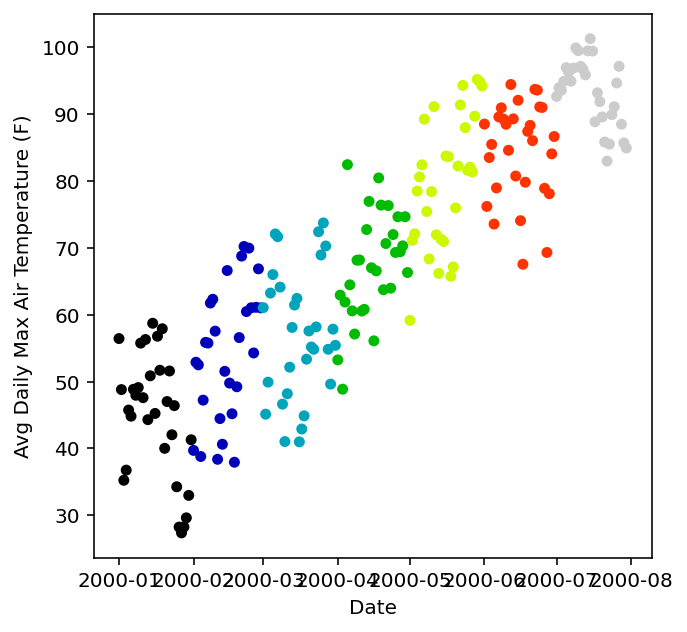

In [186]:
subset.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',figsize=(5,5), c=subset['color'] )

## Linear Regression

We are going to use a very [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression). You may implement a more complex model if you wish.

The method described here is called the least squares method and is defined as:

$m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$b = \bar{y} - m\bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the average value of $x$ and $y$ respectively.

First we need to define our X and Y values.

In [187]:
X=subset['DateInt'].values
Y=subset['Avg Daily Max Air Temperature (F)'].values

In [188]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [189]:
Y_pred = lin_reg(X,Y)

0.00030868160787265076 -2881.643572197739


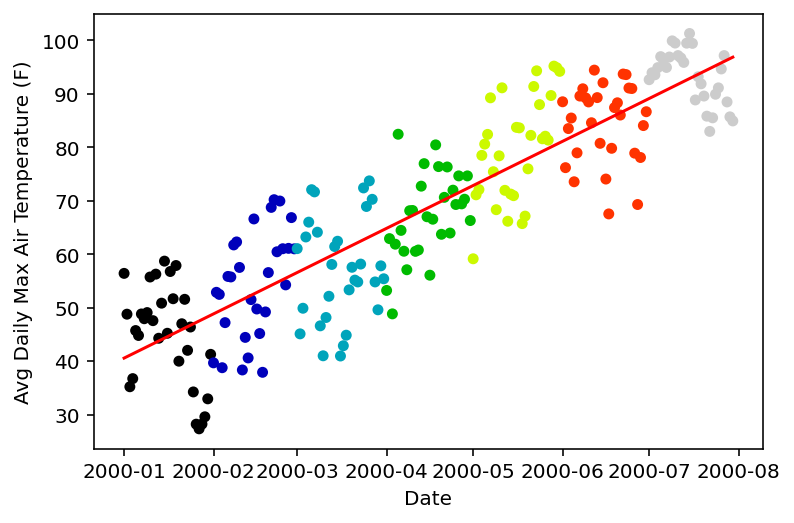

In [190]:
subset.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',c=subset['color'])
plt.plot([min(subset['Date'].values), max(subset['Date'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

>9) What are the slope and intercept of your best fit line?

**SLOPE:** 0.00030868160787265076
**Y-INTERCEPT:**  -2881.643572197739

>10) What are the minimum and maximum Y values of your best fit line? Is your slope positive or negative?

In [191]:
print(min(Y_pred))
print(max(Y_pred))

40.59828992824896
96.87218176986471


**slope is positive**

## Putting it all together

>11) Generate a best fit line for the full data set and plot the line over top of the data.

In [192]:
X=df['DateInt'].values
Y=df['Avg Daily Max Air Temperature (F)'].values


In [193]:
Y_pred = lin_reg(X,Y)

2.9525417816983494e-07 64.59485054594843


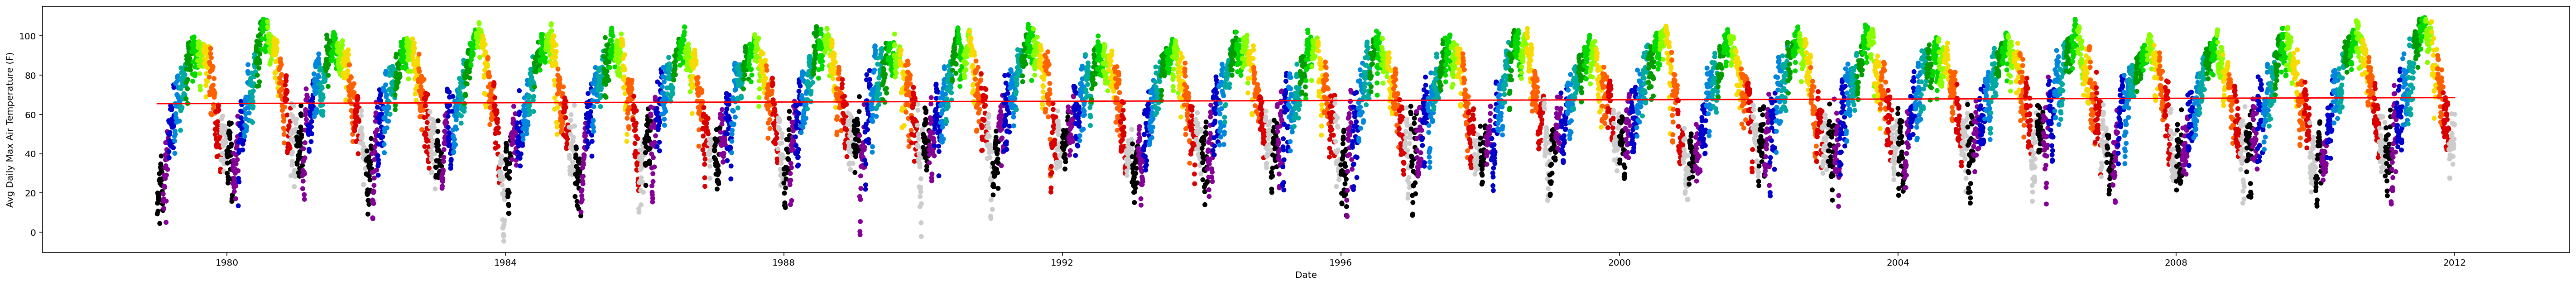

In [194]:
df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',c=df['color'], figsize = (50,5))
plt.plot([min(df['Date'].values), max(df['Date'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

>12) Is the slope positive or negative? What do you think that means?

**slope is positive, temperatures are getting steadilhy warmer**